In [1]:
# increase the width of the notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### HELLENIC OPEN UNIVERSITY - SCHOOL OF SCIENCE AND TECHNOLOGY
### DATA SCIENCE AND MACHINE LEARNING : DAMA61 ACAD. YEAR 2023-24

#### <center> WRITTEN ASSIGNMENT 3 - SOLUTIONS </center>

### Problem 1

Work with the MNIST dataset and:</br>
1) Split it into a training (6/7), and a test (1/7) set.</br>
2) Use principal component analysis (PCA) to reduce the dimensions of the system and preserve 90% of the training set’s variance.</br>
3) Train a Decision Tree with maximum depth equal to 10, a Random Forest with 50 estimators, an Extra-Trees with 50 estimators, a LinearSVC with maximum iterations equal to 500, and a Logistic Regression with maximum iterations equal to 500 classifier on the training set, and calculate the score of each one of the estimators on the test set.</br>
4) Combine the previous classifiers into a Stacking Ensemble classifier with 3-fold cross-validation and a Random Forest Classifier as the final classifier.</br>
5) What is the score of the Stacking Classifier on the test set? How much better does it perform compared to the individual classifiers?</br>

Initialize the random state to 42 in all the classifiers.

In [2]:
# import the needed packages
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [3]:
# read the data
X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False, parser="auto")

In [4]:
# split the data into training and test sets
X_train, y_train = X_mnist[:60_000]/255., y_mnist[:60_000]
X_test, y_test = X_mnist[60_000:]/255., y_mnist[60_000:]

In [5]:
# transform the data using PCA
pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
# create the individual classifiers
dec_trees_clf = DecisionTreeClassifier(max_depth = 10, random_state = 42)
random_forest_clf = RandomForestClassifier(n_estimators = 50, random_state = 42)
ada_clf = AdaBoostClassifier(n_estimators = 50, random_state = 42)
svm_clf = LinearSVC(max_iter = 500, dual = "auto", random_state = 42)
log_reg = LogisticRegression(max_iter = 500, random_state = 42)

In [7]:
# combine them in a list of tuples with the name and the estimator
named_estimators = [("random_forest", random_forest_clf),
                    ("ada_clf", ada_clf),
                    ("svm", svm_clf),
                    ("dec_trees", dec_trees_clf),
                    ("log_reg", log_reg)]

In [8]:
# train and calculate the score of each one of the estimators on the test set
scores = {}
for named_estimator in named_estimators:
    name, estimator = named_estimator
    print("Training a", estimator)
    estimator.fit(X_train_pca, y_train)
    score = estimator.score(X_test_pca, y_test)
    scores[name] = score

Training a RandomForestClassifier(n_estimators=50, random_state=42)
Training a AdaBoostClassifier(random_state=42)
Training a LinearSVC(dual='auto', max_iter=500, random_state=42)
Training a DecisionTreeClassifier(max_depth=10, random_state=42)
Training a LogisticRegression(max_iter=500, random_state=42)


In [9]:
print("Scores:")
for clf_name, clf_score in scores.items():
    print (f"{clf_name}: {clf_score:.4f}")

Scores:
random_forest: 0.9473
ada_clf: 0.7152
svm: 0.9115
dec_trees: 0.7970
log_reg: 0.9195


In [10]:
# create the stacking classifier with 5-fold cross validation and 
# a Random Forest Classifier as the final estimator and train it.
stacking_clf = StackingClassifier(
    estimators = named_estimators,
    final_estimator = RandomForestClassifier(random_state = 42),
    cv = 3)

stacking_clf.fit(X_train_pca, y_train)

StackingClassifier(cv=3,
                   estimators=[('random_forest',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=42)),
                               ('ada_clf', AdaBoostClassifier(random_state=42)),
                               ('svm',
                                LinearSVC(dual='auto', max_iter=500,
                                          random_state=42)),
                               ('dec_trees',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42)),
                               ('log_reg',
                                LogisticRegression(max_iter=500,
                                                   random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [11]:
stacking_score = stacking_clf.score(X_test_pca, y_test)
print (f"Stacking score: {stacking_score}")

Stacking score: 0.9562


In [12]:
print("The stacking classifier performs better by:")
for clf_name, clf_score in scores.items():
    print (f"{100*(stacking_score-clf_score)/stacking_score:.1f}% than the {clf_name}")

The stacking classifier performs better by:
0.9% than the random_forest
25.2% than the ada_clf
4.7% than the svm
16.6% than the dec_trees
3.8% than the log_reg


### Problem 2
Work with the MNIST dataset and:</br>
1) Keep only the digits 7, 8, and 9.</br>
2) Transform the data using principal component analysis (PCA) and keep only the first two components.</br>
3) Visualize the data by plotting the two components of each class. Use "component 1" as the x-axis and "component 2" as the y-axis of your plot.</br>
4) Use the transformed data to train several K-Means clusterers with 2 to 10 clusters and calculate the silhouette score of each one.</br>
5) What is the number of clusters that best fits the data? Does this number agree with the number of digits in the data?</br>
6) For the best K-Means model find the center of each cluster and construct and plot a representative image of each cluster.

In [13]:
# import the needed packages
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
# read the data
X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, parser="auto", as_frame=False)
y_mnist = y_mnist.astype(int)

In [15]:
# keep only the digits 7, 8, and 9.
X = X_mnist[(y_mnist > 6)]
y = y_mnist[(y_mnist > 6)]

In [16]:
# Verify the values of y_train
np.unique(y)

array([7, 8, 9])

In [17]:
# apply PCA and keep only to components
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

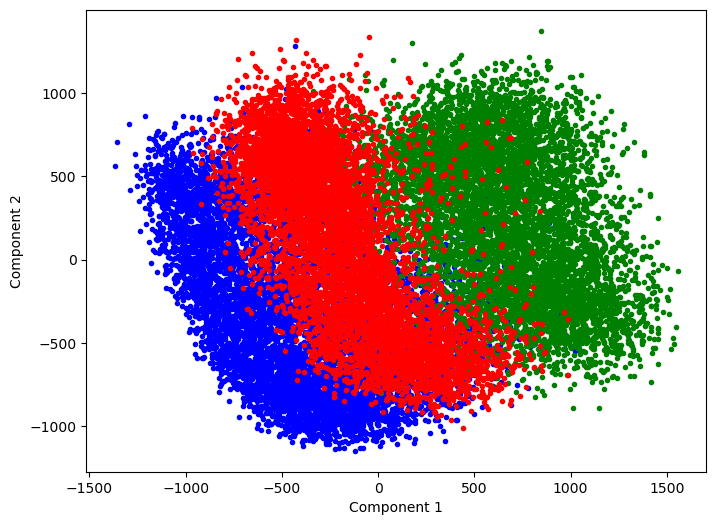

In [18]:
# visualize the data
fig = plt.figure(figsize=(8,6))
plt.plot(X_pca[y == 7, 0], X_pca[y == 7, 1], "b.")
plt.plot(X_pca[y == 8, 0], X_pca[y == 8, 1], "g.")
plt.plot(X_pca[y == 9, 0], X_pca[y == 9, 1], "r.")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [19]:
# train the KMean models
k_range = range(2, 11)
kmeans_per_k = []
for k in k_range:
    print(f"Training {k = }")
    kmeans = KMeans(n_clusters=k, n_init = "auto", random_state=42)
    kmeans.fit(X_pca)
    kmeans_per_k.append(kmeans)

Training k = 2
Training k = 3
Training k = 4
Training k = 5
Training k = 6
Training k = 7
Training k = 8
Training k = 9
Training k = 10


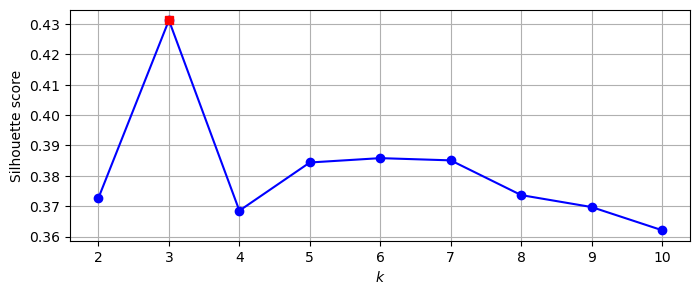

In [20]:
# calculate the silouette score.
silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k]

# find the number of clusters for the best model
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]

# the score of the best model
best_score = silhouette_scores[best_index]

# plot the silouette score as a function of the number of clusters, and the score of the best model.
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [21]:
# find the center of each cluster of the best model
best_model = kmeans_per_k[best_index]
best_model.cluster_centers_

array([[-137.03744762, -539.82284402],
       [-512.89674918,  390.53330879],
       [ 685.76159578,  219.11577527]])

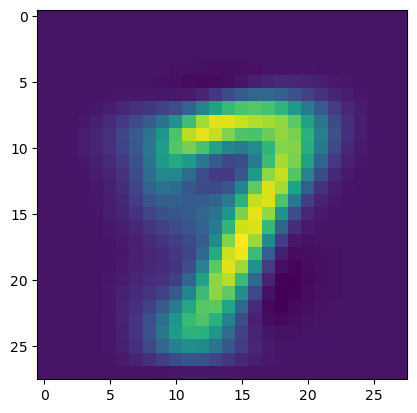

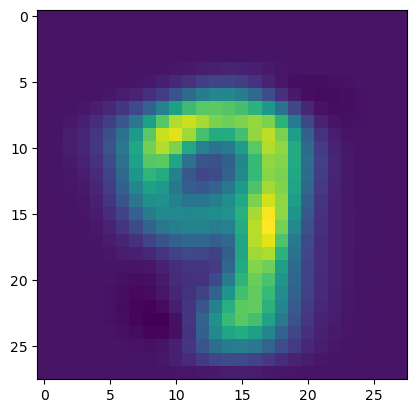

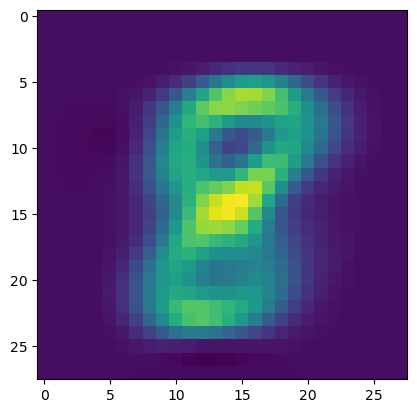

In [22]:
# construct the image using inverse transform of the pca components and plot the images
for center in best_model.cluster_centers_:
    img = pca.inverse_transform(center)
    plt.imshow(img.reshape(28,28))
    plt.show()